In [1]:
import pandas as pd
import glob
import os

In [3]:
print(sys.version)

NameError: name 'sys' is not defined

In [12]:
cpdb_file_path = '/home/sklab/miniconda3/envs/cpdb/cpdb_tutorial/db/test/v5.0.0/cellphonedb.zip'
meta_file_path = '/home/sklab/spleen PPI/metadata.csv'
counts_file_path = '/home/sklab/spleen PPI/input_cpdb.csv'
out_path = '/home/sklab/spleen PPI/'



In [13]:
meta_file_path = '/home/sklab/spleen PPI/metadata.csv'

In [14]:
metadata = pd.read_csv(meta_file_path, sep = '\t')

In [15]:
metadata.head(3)

,"Cell,cell_type"
0,"cell_type1,TB"
1,"cell_type2,ST"
2,"cell_type3,LSK"


In [16]:
countfile = pd.read_csv(counts_file_path, sep = '\t')

In [17]:
countfile.shape

(41, 1)

In [18]:
countfile.head(3)

,"ProteinID,cell_type1,cell_type2,cell_type3"
0,"COL1A1,298.95,0.433333333,0.65"
1,"COL4A1,282.9333333,12.26666667,4.816666667"
2,"COL6A1,298.5333333,0.933333333,0.68"


In [19]:
from cellphonedb.src.core.methods import cpdb_analysis_method


In [19]:
cpdb_results = cpdb_analysis_method.call(
    cpdb_file_path = cpdb_file_path,           # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,           # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,       # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',               # defines the gene annotation in counts matrix.
     # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                 # optional: whether to score interactions or not. 
    output_path = out_path,                    # Path to save results    microenvs_file_path = None,
    separator = '|',                           # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    threads = 5,                               # number of threads to use in the analysis.
    threshold = 0.1,                           # defines the min % of cells expressing a gene for this to be employed in the analysis.
    result_precision = 3,                      # Sets the rounding for the mean values in significan_means.
    debug = False,                             # Saves all intermediate tables emplyed during the analysis in pkl format.
    output_suffix = None                       # Replaces the timestamp in the output files by a user defined string in the  (default: None)
)


[ ][CORE][04/06/24-21:53:53][INFO] [Non Statistical Method] Threshold:0.1 Precision:3
Reading user files...
The following user files were loaded successfully:
/home/sklab/spleen PPI/input_cpdb.csv
/home/sklab/spleen PPI/metadata.csv
[ ][CORE][04/06/24-21:53:54][INFO] Running Basic Analysis
[ ][CORE][04/06/24-21:53:54][INFO] Building results
[ ][CORE][04/06/24-21:53:54][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 1118.78it/s]

[ ][CORE][04/06/24-21:53:54][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 2645.69it/s]

[ ][CORE][04/06/24-21:53:54][INFO] Scoring interactions: Calculating scores for all interactions and cell types..



100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 900.24it/s]

Saved means_result to /home/sklab/spleen PPI/simple_analysis_means_result_06_04_2024_215354.txt
Saved deconvoluted to /home/sklab/spleen PPI/simple_analysis_deconvoluted_06_04_2024_215354.txt
Saved deconvoluted_percents to /home/sklab/spleen PPI/simple_analysis_deconvoluted_percents_06_04_2024_215354.txt
Saved interaction_scores to /home/sklab/spleen PPI/simple_analysis_interaction_scores_06_04_2024_215354.txt


In [20]:
print(cpdb_results.keys())

dict_keys(['means_result', 'deconvoluted', 'deconvoluted_percents', 'interaction_scores'])


In [21]:
cpdb_results['means_result'].head(2)



,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,classification,LSK|LSK,LSK|ST,LSK|TB,ST|LSK,ST|ST,ST|TB,TB|LSK,TB|ST,TB|TB
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.1,0.1,0.1,13.150,13.150,13.150,134.332993,134.332993,134.332993
6,CPI-SC0CCCF9A7F,COL14A1_integrin_a2b1_complex,simple:Q05707,complex:integrin_a2b1_complex,COL14A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.1,0.1,0.1,1.858,1.858,1.858,143.800003,143.800003,143.800003


In [22]:
cpdb_results['interaction_scores'].head(2)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,classification,LSK|LSK,LSK|ST,LSK|TB,ST|LSK,ST|ST,ST|TB,TB|LSK,TB|ST,TB|TB
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.0,0.0,0.0,9.722,0.0,0.0,100.0,0.0,0.0
6,CPI-SC0CCCF9A7F,COL14A1_integrin_a2b1_complex,simple:Q05707,complex:integrin_a2b1_complex,COL14A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.0,0.0,0.0,1.224,0.0,0.0,100.0,0.0,0.0


In [23]:
cpdb_results['deconvoluted'].head(2)


,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,gene,LSK,ST,TB
multidata_id,,,,,,,,,,
930,COL12A1,Q99715,False,COCA1_HUMAN,NaN,CPI-SC0B86B7CED,COL12A1,0.1,26.200001,268.566986
720,COL14A1,Q05707,False,COEA1_HUMAN,NaN,CPI-SC0CCCF9A7F,COL14A1,0.1,3.617000,287.500000


In [24]:
cpdb_results['deconvoluted_percents'].head(2)


,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,gene,LSK,ST,TB
multidata_id,,,,,,,,,,
930,COL12A1,Q99715,False,COCA1_HUMAN,NaN,CPI-SC0B86B7CED,COL12A1,1.0,1.0,1.0
720,COL14A1,Q05707,False,COEA1_HUMAN,NaN,CPI-SC0CCCF9A7F,COL14A1,1.0,1.0,1.0


In [26]:
import ktplotspy as kpy
import matplotlib.pyplot as plt


In [20]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method


In [21]:
cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
       # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 5,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/home/sklab/spleen PPI/input_cpdb.csv
/home/sklab/spleen PPI/metadata.csv
[ ][CORE][14/06/24-22:26:42][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:5 Precision:3
[ ][CORE][14/06/24-22:26:42][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][14/06/24-22:26:43][INFO] Running Real Analysis
[ ][CORE][14/06/24-22:26:43][INFO] Running Statistical Analysis


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3097.93it/s]

[ ][CORE][14/06/24-22:26:43][INFO] Building Pvalues result
[ ][CORE][14/06/24-22:26:43][INFO] Building results
[ ][CORE][14/06/24-22:26:43][INFO] Scoring interactions: Filtering genes per cell type..



100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 1138.21it/s]

[ ][CORE][14/06/24-22:26:43][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 2642.91it/s]


[ ][CORE][14/06/24-22:26:43][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 622.04it/s]

Saved deconvoluted to /home/sklab/spleen PPI/statistical_analysis_deconvoluted_06_14_2024_222643.txt
Saved deconvoluted_percents to /home/sklab/spleen PPI/statistical_analysis_deconvoluted_percents_06_14_2024_222643.txt
Saved means to /home/sklab/spleen PPI/statistical_analysis_means_06_14_2024_222643.txt
Saved pvalues to /home/sklab/spleen PPI/statistical_analysis_pvalues_06_14_2024_222643.txt
Saved significant_means to /home/sklab/spleen PPI/statistical_analysis_significant_means_06_14_2024_222643.txt
Saved interaction_scores to /home/sklab/spleen PPI/statistical_analysis_interaction_scores_06_14_2024_222643.txt


In [22]:
list(cpdb_results.keys())


['deconvoluted',
 'deconvoluted_percents',
 'means',
 'pvalues',
 'significant_means',
 'CellSign_active_interactions',
 'CellSign_active_interactions_deconvoluted',
 'interaction_scores']

In [23]:
cpdb_results['pvalues'].head(2)



,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,classification,LSK|LSK,LSK|ST,LSK|TB,ST|LSK,ST|ST,ST|TB,TB|LSK,TB|ST,TB|TB
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.658,0.334,0.828,0.676,0.329,0.481,0.165,0.0,0.0
6,CPI-SC0CCCF9A7F,COL14A1_integrin_a2b1_complex,simple:Q05707,complex:integrin_a2b1_complex,COL14A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,0.658,0.334,0.504,0.828,0.329,0.646,0.165,0.0,0.0


In [24]:
cpdb_results['means'].head(2)


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,classification,LSK|LSK,LSK|ST,LSK|TB,ST|LSK,ST|ST,ST|TB,TB|LSK,TB|ST,TB|TB
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,2.667,124.728996,12.117,13.150,135.212997,22.600,134.332993,256.395996,143.783005
6,CPI-SC0CCCF9A7F,COL14A1_integrin_a2b1_complex,simple:Q05707,complex:integrin_a2b1_complex,COL14A1,NaN,True,False,False,curated,...,Adhesion by Collagen/Integrin,4.483,126.545998,13.933,1.858,123.920998,11.308,143.800003,265.862000,153.250000


In [25]:
cpdb_results['significant_means'].head(2)


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,rank,LSK|LSK,LSK|ST,LSK|TB,ST|LSK,ST|ST,ST|TB,TB|LSK,TB|ST,TB|TB
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.395996,143.783005
86,CPI-SC0C739EDCE,COL18A1_integrin_a1b1_complex,simple:P39060,complex:integrin_a1b1_complex,COL18A1,NaN,True,False,False,curated,...,0.222,NaN,NaN,NaN,NaN,150.699997,NaN,NaN,250.199997,NaN


In [26]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline


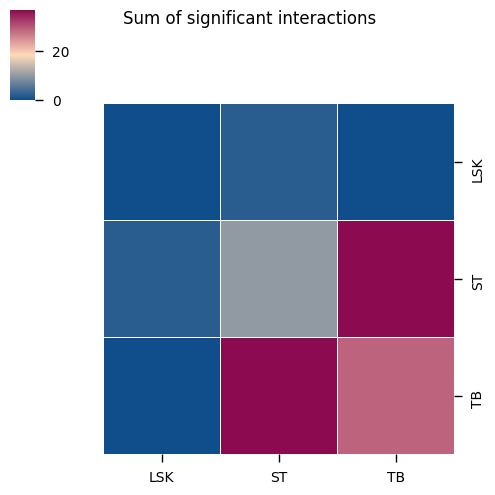

In [27]:
kpy.plot_cpdb_heatmap(pvals = cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (5, 5),
                      title = "Sum of significant interactions")


In [151]:
kpy.plot_cpdb(
    adata = anndata_obj,
    cell_type1 = "TB|ST",
    cell_type2 = "LSK",
    means = cpdb_results['means'],
    pvals = cpdb_results['pvalues'],
    celltype_key = "cell_labels",
    genes = ["COL12A1"],
    figsize = (10, 3),
    title = "Interactions between\nPV and trophoblast",
    max_size = 3,
    highlight_size = 0.75,
    degs_analysis = False,
    standard_scale = True,
    interaction_scores = cpdb_results['interaction_scores'],
    scale_alpha_by_interaction_scores = True
)


KeyError: 'cell_labels'

In [145]:
anndata_obj = ad.AnnData(countfile)


In [147]:
print(anndata_obj)
anndata_obj.shape

AnnData object with n_obs × n_vars = 39 × 1


(39, 1)

In [130]:
print(metadata.columns)


Index(['Cell', 'cell_labels'], dtype='object')


In [150]:
from cellphonedb.utils import search_utils

search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['ST', 'TB'],  # List of cells 1, will be paired to cells 2 (list or 'All').
    query_cell_types_2 = ['LSK'],     # List of cells 2, will be paired to cells 1 (list or 'All').
    query_genes = ['COL12A1'],                                       # filter interactions based on the genes participating (list).
    query_interactions = ['COL12A1_ITGA2B'],                            # filter intereactions based on their name (list).
    significant_means = cpdb_results['significant_means'],          # significant_means file generated by CellphoneDB.
    deconvoluted = cpdb_results['deconvoluted'],                    # devonvoluted file generated by CellphoneDB.
    interaction_scores = cpdb_results['interaction_scores'],        # interaction score generated by CellphoneDB.
    query_minimum_score = 50,                                       # minimum score that an interaction must have to be filtered.
    separator = '|',                                                # separator (default: |) employed to split cells (cellA|cellB).
    long_format = True,                                             # converts the output into a wide table, removing non-significant interactions
    query_classifications = ['Signaling by Transforming growth factor']
)

search_results.head()


,interacting_pair,partner_a,partner_b,gene_a,gene_b,directionality,classification,interacting_cells,significant_mean
0,COL12A1_integrin_a1b1_complex,simple:Q99715,complex:integrin_a1b1_complex,COL12A1,NaN,Adhesion-Adhesion,Adhesion by Collagen/Integrin,TB|LSK,139.563004
1,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,Adhesion-Adhesion,Adhesion by Collagen/Integrin,TB|LSK,134.332993


In [128]:
metadata = pd.DataFrame({
    'Cell': ['cell_type1', 'cell_type2', 'cell_type3'],
    'cell_labels': ['TB', 'ST', 'LSK']
})

In [129]:
metadata.to_csv('metadata.csv', index=False)